# Course: Introduction to Network Analysis in Python
These notes are taken from DataCamp course. You will learn:
* Basics of networks and network analysis
* How to find important nodes
* How to identify communities of nodes
* How to use networkx and nxviz packages
* How to write network algorithms

## Chapter 1: Introduction to Networks

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph() # define empty graph

In [3]:
G.add_nodes_from([1,2,3,4,5,6,7,8,9]) # add nodes from list

In [4]:
G.nodes() # this will give list of nodes
# this will show you size of the network
# len(G.nodes())

# you can list the nodes as
# list(G.nodes())

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9))

In [5]:
G.add_edge(1,2) # add edge between nodes 1 and 2
G.add_edge(1,3)
G.add_edge(3,5)
G.add_edge(2,3)
G.add_edge(2,5)
G.add_edge(7,3)
G.add_edge(7,5)

In [6]:
G.edges() # this will give tuples of edges: each tuple shows the nodes that are connected through the edge

EdgeView([(1, 2), (1, 3), (2, 3), (2, 5), (3, 5), (3, 7), (5, 7)])

In [7]:
# Metadata can be stored on the graph as well, like dictionary
G.node[1]['label'] = 'blue'
G.nodes(data=True)
# Recall that passing in the keyword argument data=True in these methods retrieves the corresponding metadata associated with the nodes and edges as well.

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}})

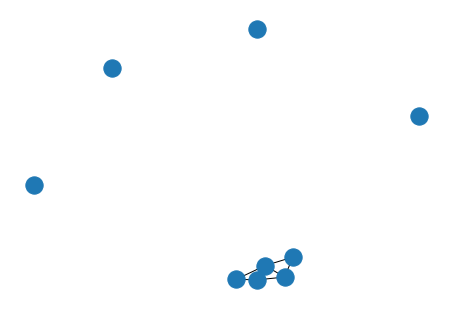

In [8]:
# draw the graph
nx.draw(G)
plt.show()

In [9]:
G.nodes(data=True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}})

In [10]:
G.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 3, {}), (2, 3, {}), (2, 5, {}), (3, 5, {}), (3, 7, {}), (5, 7, {})])

In [11]:
# edge properties
G.edges[1,2] #[node1, node2]

{}

In [12]:
G.edges[1,2]['property'] = 'new'
G.edges(data=True)

EdgeDataView([(1, 2, {'property': 'new'}), (1, 3, {}), (2, 3, {}), (2, 5, {}), (3, 5, {}), (3, 7, {}), (5, 7, {})])

In [13]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3), (2, 5), (3, 5), (3, 7), (5, 7)])

In [14]:
G.edges(data=True)

EdgeDataView([(1, 2, {'property': 'new'}), (1, 3, {}), (2, 3, {}), (2, 5, {}), (3, 5, {}), (3, 7, {}), (5, 7, {})])

In [15]:
G.edges[1,2]

{'property': 'new'}

## Network Visualiztion
* Matrix Plots
* Arc Plots
* Circos Plots

<img src = 'network_viz.png' style = "width:500px;height:220px"/>


In [16]:
import nxviz as nv
import matplotlib.pyplot as plt

In [17]:
# mp = nv.MatrixPlot(G) # matrix plot
# ap = nv.ArcPlot(G) # arc plot
# ap_customized = nv.ArcPlot(G, node_order='category', node_color='category') # 'category' is one feature of the node
# cp = nv.CircosPlot(G) # circos plot
# ap.draw()
# plt.show()

In [18]:
# convert Graph to matrix
A = nx.to_numpy_matrix(G)

# Convert A back to the NetworkX form as a directed graph: G_conv
G_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
plt.show()

## Chapter 2: Important Nodes
* Degree Centrality
    * degree centrality of node X = no. of neighbors that node X have / no. of neighbors that node X could possibly have
    * we don't need the whole Graph (with its connections) to calculate degree centrality
        
* Betweenness Centrality
    * Betweenness centrality is a node importance metric that uses information about the shortest paths in a network. It is defined as the fraction of all possible shortest paths between any pair of nodes that pass through the node.
    * we need the whole Graph (with its connections) to calculate betweenness centrality
        
        

In [19]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3), (2, 5), (3, 5), (3, 7), (5, 7)])

In [20]:
list(G.neighbors(1)) # neighbors of node 1

[2, 3]

In [21]:
# degree centrality
nx.degree_centrality(G)
# note that self loops are not considered in degree centrality

{1: 0.25, 2: 0.375, 3: 0.5, 4: 0.0, 5: 0.375, 6: 0.0, 7: 0.25, 8: 0.0, 9: 0.0}

In [22]:
# betweenness centrality
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.017857142857142856,
 3: 0.07142857142857142,
 4: 0.0,
 5: 0.017857142857142856,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0}

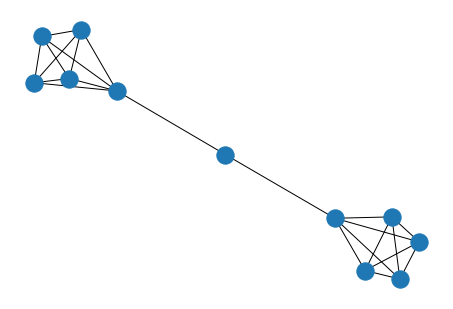

In [23]:
# e.g. 
exampleG = nx.barbell_graph(m1 = 5, m2 =1)
nx.draw(exampleG)

In [24]:
nx.betweenness_centrality(exampleG)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 5: 0.5555555555555556}

### Graph Algorithms
    * Shortest path (optimization)
    * Disease spread, information spread (modeling)
    
* Breadth-first search algorithm (BFS)


In [25]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = list(G.neighbors(node))
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path again does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

path_exists(G,2,7)

Path exists between nodes 2 and 7


True

In [26]:
list(G.neighbors(2)), list(G.neighbors(3))

([1, 3, 5], [1, 5, 2, 7])

In [27]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3), (2, 5), (3, 5), (3, 7), (5, 7)])

In [28]:
path_exists(G,2,7)

Path exists between nodes 2 and 7


True

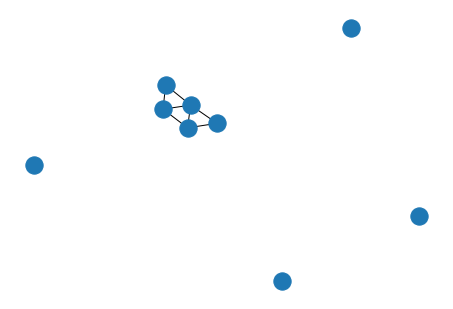

In [29]:
nx.draw(G)
plt.show()

## Chapter 3: Structures
### Communities & Cliques

In [30]:
# social clique: tightly-knit groups
# network clique: completely connected graphs

In [31]:
# to check whether node x1 and node x2 are connected?
x1, x2 = 1, 3
G.has_edge(x1, x2)

True

In [32]:
# Identify triangle relationship
from itertools import combinations

# Define is_in_triangle()
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not.

    Returns a boolean.
    """
    in_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

is_in_triangle(G, 1)

True

In [33]:
# Finding nodes involved in triangles
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):

            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)

            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)

    return triangle_nodes

nodes_in_triangle(G, 1)

{1, 2, 3}

In [34]:
# Finding open triangles: Recall that they form the basis of friend recommendation 
# systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".

def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):

            in_open_triangle = True

            break

    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in G.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(G, n):

        # Increment num_open_triangles
        num_open_triangles += 1

print(num_open_triangles)


3


In [35]:
# Maximum Cliques

# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

maximal_cliques(G, 3)

[[3, 2, 1], [3, 2, 5], [3, 7, 5]]

In [36]:
# Subgraph

# generate a graph
G = nx.erdos_renyi_graph(n = 20, p = 0.2) # p = probability that edge exists between a pair of nodes, n = no. of nodes in the graph
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [37]:
# create subgraph of node m with its neighbors
m = 9
nodes = list(G.neighbors(m))
# keep node m in the list of its neighbors
nodes.append(m)

In [38]:
G_m = G.subgraph(nodes)
G_m.edges()

EdgeView([(9, 11), (9, 12), (9, 14)])

In [39]:
print(type(G), type(G_m))

<class 'networkx.classes.graph.Graph'> <class 'networkx.classes.graph.Graph'>


## Chapter 4: Case study

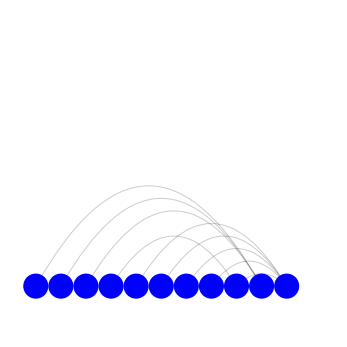

In [40]:
# Characterizing editing communities:
# You're now going to combine what you've learned about the BFS algorithm and concept of maximal cliques to visualize the network with an ArcPlot.

# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()
# Note that for NetworkX version 2.x and later, G.subgraph(nodelist) returns only an immutable view on the original graph. 
# We must explicitly ask for a .copy() of the graph to obtain a mutatable version.

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [41]:
# Recommending co-editors who have yet to edit together

# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
# TIP:
# regular dictionary will give error if some key is not present 
# defaultdict won't give error if key is not present; it will just creat default value 0 for that key. 
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[(16, 18), (12, 14)]


# Course: Intermediate Network Analysis in Python

## Chapter 1: Bipartite graphs & product recommendation systems
Two conditions for defining bipartite graph:
* 1. A graph that is partitioned into two sets
* 2. nodes are only connected to the nodes in other partitions

This is in contrast to the the unipartite graphs (that are not partitioned into two sets) that we have been working so far...

Example of bipartite graph:
Customers ang Products can be nodes in a graph but partitioned into two sets. Customers are connected to products and vice-versa. But any two customers/products are not connected to each other.

In [42]:
# How to check the bipartite property: Nodes will have the property key word bipartite. For example:
G = nx.Graph()

numbers = range(3)
G.add_nodes_from(numbers, bipartite = 'customers') # numbers are customers

letters = ['a', 'b']
G.add_nodes_from(letters, bipartite = 'products') # letters are products

G.nodes(data=True)

NodeDataView({0: {'bipartite': 'customers'}, 1: {'bipartite': 'customers'}, 2: {'bipartite': 'customers'}, 'a': {'bipartite': 'products'}, 'b': {'bipartite': 'products'}})

In [43]:
# how to do you filter out the partitions: using list comprehension
customer_nodes = [n for n, d in G.nodes(data = True) if d['bipartite'] == 'customers']
customer_nodes

[0, 1, 2]

In [44]:
# or use this function
def get_nodes_from_partition(G,partition):
   '''
   G: Graph object
   partition: String , name of the partition we want info about.
   '''
   nodes=[n for n,d in G.nodes(data=True) if d['bipartite']==partition]
   return nodes   # this contains the node that belong to a particular partition

get_nodes_from_partition(G, 'customers')

[0, 1, 2]

In [45]:
G.add_edge(2,'a')
G.add_edge(2,'b')
G.add_edge(1,'b')
G.add_edge(0,'b')

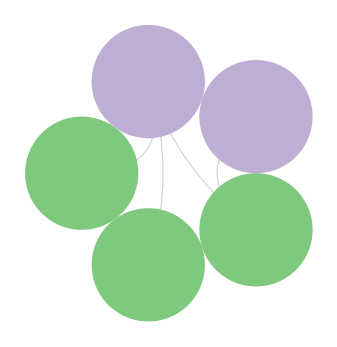

In [46]:
cp = nv.CircosPlot(G, node_color='bipartite')
cp.draw()
plt.show()

In [47]:
# Bipartite Degree Centrality = number of neighbors/number of possible neighbors (in other partition)
nx.bipartite.degree_centrality(G, ['a','b']) # 2nd argument is list of nodes from one of the partition
# nx.bipartite.degree_centrality(G, customer_nodes) # this will give you same result

{'b': 1.0, 'a': 0.3333333333333333, 0: 0.5, 1: 0.5, 2: 1.0}

Note that you don't want regular degree centrality score from nx.degree_centrality(G) here because of the nature (bipartite) of the data.

#### Recommendation
In case of uni-partite graph, the recommendation was based on the neighbor pair of any node n. That is if neighbor pair is not connected then we can recommend this pair to get connected.

But in case of bipartite graph, the recommendation is based on how a customer in one partition is not connected to product in other partition. The focus here is on computing customer similarity in bipartite graphs.

In [48]:
def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.node[node1]['bipartite'] == G.node[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

# Print the number of shared repositories between users 0 and 1
print(len(shared_partition_nodes(G, 0, 1)))

1


##### Customer Similarity Metric = Number of products shared between two customers / total number of products 

This can then be used to find Customers that are similar to one another.

In [49]:
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'customers' partition
    assert G.node[user1]['bipartite'] == 'customers'
    assert G.node[user2]['bipartite'] == 'customers'

    # Get the set of nodes shared between the two customers
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the products partition
    return len(shared_nodes) / len(proj_nodes)

# Compute the similarity score between customers 0 and 1
product_nodes = get_nodes_from_partition(G, 'products')
similarity_score = user_similarity(G, 0, 1, product_nodes)

print(similarity_score)


0.5


##### Find similar users 

In [50]:
from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.node[user]['bipartite'] == 'customers'

    # Get other nodes from customer partition
    user_nodes = set(user_nodes) 
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of customer that share maximal similarity
    return similarities[max_similarity]

customer_nodes = get_nodes_from_partition(G, 'customers')
product_nodes = get_nodes_from_partition(G, 'products')

print(most_similar_users(G, 0, customer_nodes, product_nodes))


[1, 2]


##### Recommendation
You're close to the end! Here, the task is to practice using set differences, and you'll apply it to recommending products from a second customer that the first customer should buy.

In [51]:
def recommend_products(G, from_user, to_user):
    # Get the set of products that from_user has bought
    from_product = set(G.neighbors(from_user))
    # Get the set of products that to_user has bought
    to_product = set(G.neighbors(to_user))

    # Identify products that the from_user is connected to that the to_user is not connected to
    return from_product.difference(to_product)

# Print the products to be recommended
print(recommend_products(G, 2, 1))


{'a'}


## Chapter 2: Graph projections
Useful to investigate the relationships between nodes on one partition
 - conditioned on the connections to the nodes in the other partition

In [52]:
# Usage of NetworkX's disk I/O functions
# Read in the data
G = nx.read_edgelist('sample_data-Copy1.edgelist')
# Open the file: 1st entry is name (node in one partition), 2nd is club (node in other partition), 3rd is node property

# Assign nodes to 'clubs' or 'people' partitions
for n, d in G.nodes(data=True):
    if '.' in n:
        G.node[n]['bipartite'] = 'people'
    else:
        G.node[n]['bipartite'] = 'clubs'
        
# Print the edges of the graph
#print(G.edges())

In [53]:
# nodes in clubs partition
club_nodes = [n for n, d in list(G.nodes(data=True)) if d['bipartite'] == 'clubs']
club_nodes

['TeaParty',
 'StAndrewsLodge',
 'BostonCommittee',
 'NorthCaucus',
 'LondonEnemies',
 'LongRoomClub',
 'LoyalNine']

### Computing Projection
The "projection" of a graph onto one of its partitions is the connectivity of the nodes in that partition conditioned on connections to nodes on the other partition. Made more concretely, you can think of the "connectivity of customers based on shared purchases".

Command: nx.bipartite.projected_graph(Graph, partition)

In [54]:
# Prepare the nodelists needed for computing projections: people, clubs
people = [n for n in G.nodes() if G.node[n]['bipartite'] == 'people']
clubs = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'clubs']

# Compute the people and clubs projections: peopleG, clubsG
peopleG = nx.bipartite.projected_graph(G, people)
clubsG = nx.bipartite.projected_graph(G, clubs)

You can obtain the projected graph as sparse matrix representation from matrix multiplication in the next topic.

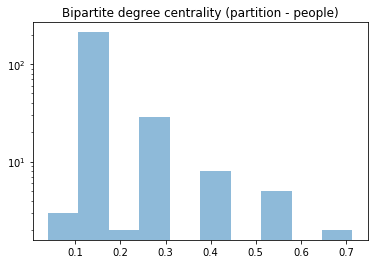

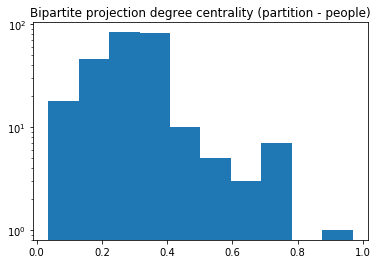

In [55]:
# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure() 
original_dc = nx.bipartite.degree_centrality(G, people)  
plt.hist(list(original_dc.values()), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality (partition - people)')
plt.show()


# Plot the degree centrality distribution of the peopleG graph
plt.figure()
people_dc = nx.degree_centrality(peopleG)
plt.hist(list(people_dc.values()))
plt.yscale('log')
plt.title('Bipartite projection degree centrality (partition - people)')
plt.show()

### Bipartite graphs as matrices

- Rows: node on one partition
- Columns: node on other partition
- Cells: 1 if edge present, else 0

Command: mat = nx.bipartite.biadjacency_matrix(G, row_order = one_partition_nodes, columns_order = other_partition_nodes)

The result is sparse representation of the matrix.

Note that you can get the projection using the adjacency matrix representation of bigraphs. Here is projection calculated visually - 
<img src = 'Matrix_Projection.png' style = "width:500px;height:250px"/>

The diagonal tells us the people are connected to how many clubs.

<img src = 'Matrix_Projection1.png' style = "width:500px;height:200px"/>

The off-diagonal tells us how people share the relationship of being connected to a number of clubs. You can relate this to the projection obtained by nx.bipartite.projected_graph(Graph, partition)

<img src = 'Matrix_Projection2.png' style = "width:500px;height:200px"/>

In python, you can get the projecttion = mat @ mat.T (@ operator does the matrix multiplication)

In [56]:
# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(G, 'people')
clubs_nodes = get_nodes_from_partition(G, 'clubs')

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=people_nodes, column_order=clubs_nodes)

# Compute the user-user projection: user_matrix
user_matrix = bi_matrix @ bi_matrix.T

user_matrix, bi_matrix

(<254x254 sparse matrix of type '<class 'numpy.int64'>'
 	with 19666 stored elements in Compressed Sparse Row format>,
 <254x7 sparse matrix of type '<class 'numpy.int64'>'
 	with 319 stored elements in Compressed Sparse Row format>)

#### Find shared membership: Transposition
As you may have observed, you lose the metadata from a graph when you go to a sparse matrix representation. You're now going to learn how to impute the metadata back so that you can learn more about shared membership.

In [71]:
import numpy as np 

# Find out the names of people who were members of the most number of clubs
diag = user_matrix.diagonal()             
indices = np.where(diag == diag.max())[0]
print('Number of clubs: {0}'.format(diag.max()))
print('People with the most number of memberships:')
for i in indices:
    print('- {0}'.format(people_nodes[i]))  

# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()

# Find pairs of users who shared membership in the most number of clubs
indices2 = np.where(users_coo.data == users_coo.data.max())[0] 

print('People with most number of shared memberships:')
for idx in indices2:
    print('- {0}, {1}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]])) 

Number of clubs: 0
People with the most number of memberships:
- Bruce.Stephen
- Stanbridge.Henry
- Appleton.Nathaniel
- Bradford.John
- Davis.Caleb
- Wendell.Oliver
- Mackay.William
- Sweetser.John
- Pierpont.Robert
- Otis.James
- Boynton.Richard
- Greenleaf.William
- Warren.Joseph
- Barber.Nathaniel
- Hill.Alexander
- Young.Thomas
- Adams.Samuel
- Powell.William
- Quincy.Josiah
- Church.Benjamin
- Molineux.William
- Greenleaf.Joseph
- Dennie.William
- Brimmer.Martin
- Noyces.Nat
- Sigourney.John
- Blake.Increase
- Emmes.Samuel
- Hickling.William
- Hitchborn.Thomas
- Phillips.Samuel
- Fleet.Thomas
- Webster.Thomas
- Waldo.Benjamin
- Whitwell.William
- Graham.James
- Allen.Dr
- Bewer.James
- Milliken.Thomas
- Symmes.John
- Melville.Thomas
- Hancock.John
- Greenough.Newn
- Palfrey.William
- Parker.Jonathan
- Ruddock.Abiel
- Symmes.Eben
- Bray.George
- Simpson.Benjamin
- Grant.Moses
- Johnston.Eben
- Doyle.Peter
- Collson.Adam
- Bolter.Thomas
- Loring.Matthew
- Story.Elisha
- Baldwin.Cyr

#### Representing Network Data with Pandas: make nodelist and edgelist

In [85]:
# Initialize a list to store each edge as a record: nodelist
import pandas as pd
nodelist = []
for n, d in G.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'name': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
print(node_df.head())


               name bipartite
0     Bruce.Stephen    people
1          TeaParty     clubs
2  Stanbridge.Henry    people
3    StAndrewsLodge     clubs
4   BostonCommittee     clubs


In [86]:
# Initialize a list to store each edge as a record: edgelist
edgelist = []
for n1, n2, d in G.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)
    
# Create a pandas DataFrame of the edgelist: edge_df
edge_df = pd.DataFrame(edgelist)
print(edge_df.head())

           node1            node2  weight
0  Bruce.Stephen         TeaParty       1
1       TeaParty     Young.Thomas       1
2       TeaParty      Bewer.James       1
3       TeaParty  Melville.Thomas       1
4       TeaParty  Parker.Jonathan       1


## Chapter 3: Graph Differences

#### Evolving Graphs: that change over time e.g. communication networks

Assumptions:
* 1. edges change over time, assume nodes stay constant (easier to analyze)
* 2. both edges and nodes changes over time

Let's assume the 1st case where nodes remain constant. In that case, we can use nx.difference(G2, G1) that tells us what are extra edges in G2 that are not present in G1. This is analogous to set {} difference like = set(edges of G2).difference(set(edges of G1))

#### Evolving Graph Statistics
* Number of nodes
* Number of edges
* Degree distribution
* Centrality distribution

## Graph Algorithm - Practical Examples in Apache Spark and Neo4j
Notes
### Chapter 3: Graph Platform & Processing
#### Platform Consideration
There’s debate as to whether it’s better to scale up or scale out graph processing. Should you use powerful multicore, large-memory machines and focus on efficient data structures and multithreaded algorithms?

#### Processing Consideration
There are different approaches for expressing data processing; for example, stream or batch processing or the map-reduce paradigm for records-based data. However, for graph data, there also exist approaches which incorporate the data dependencies inherent in graph structures into their processing:
##### Node-centric
This approach uses nodes as processing units, having them accumulate and com‐ pute state and communicate state changes via messages to their neighbors. This model uses the provided transformation functions for more straightforward implementations of each algorithm.
##### Relationship-centric
This approach has similarities with the node-centric model but may perform bet‐ ter for subgraph and sequential analysis.
##### Graph-centric
These models process nodes within a subgraph independently of other subgraphs while (minimal) communication to other subgraphs happens via messaging.
##### Traversal-centric
These models use the accumulation of data by the traverser while navigating the graph as their means of computation.
##### Algorithm-centric
These approaches use various methods to optimize implementations per algo‐ rithm. This is a hybrid of the previous models.

TIP: Pregel is a node-centric, fault-tolerant parallel processing frame‐ work created by Google for performant analysis of large graphs. Pregel is based on the bulk synchronous parallel (BSP) model. BSP simplifies parallel programming by having distinct computation and communication phases.

#### Representative Platforms
To address the requirements of graph processing, several platforms have emerged. Traditionally there was a separation between graph compute engines and graph data‐ bases, which required users to move their data depending on their process needs:
##### Graph compute engines
These are read-only, nontransactional engines that focus on efficient execution of iterative graph analytics and queries of the whole graph. Graph compute engines support different definition and processing paradigms for graph algorithms, like node-centric (e.g., Pregel, Gather-Apply-Scatter) or MapReduce-based approaches (e.g., PACT). Examples of such engines are Giraph, GraphLab, Graph-Engine, and Apache Spark.
##### Graph databases
From a transactional background, these focus on fast writes and reads using smaller queries that generally touch a small fraction of a graph. Their strengths are in operational robustness and high concurrent scalability for many users.

TIP: 
* Spark is an example of a scale-out and node-centric graph compute engine.
    * Two dataframes - node (unique id and properties) and relationship (source node, destination node, weight etc...)
* The Neo4j Graph Platform is an example of a tightly integrated graph database and algorithm-centric processing, optimized for graphs. 
    * Query language Cypher (declarative). Neo4j Graph Algorithms library is installed as a plug-in alongside the database and provides a set of user-defined proce‐ dures that can be executed via the Cypher query language. The graph algorithm library includes parallel versions of algorithms supporting graph analytics and machine learning workflows. Neo4j Awesome Procedures on Cypher (APOC) library consists of more than 450 proce‐ dures and functions to help with common tasks such as data inte‐ gration, data conversion, and model refactoring.